In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("scholarship.csv")

In [3]:
df = data.copy()

In [4]:
df.head()

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0


In [5]:
df.shape

(1000, 3)

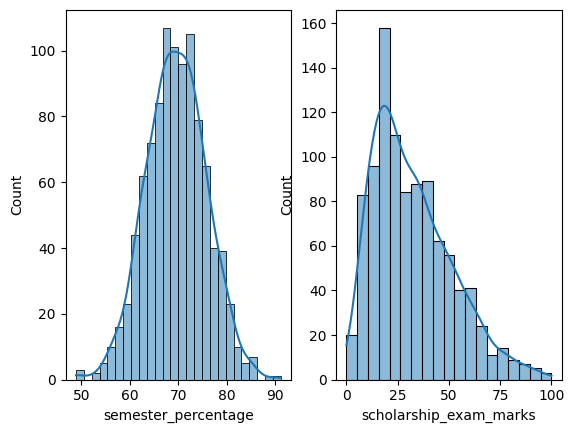

In [6]:
plt.subplot(1,2,1)
sns.histplot(df['semester_percentage'],kde=True)
plt.subplot(1,2,2)
sns.histplot(df['scholarship_exam_marks'],kde=True)
plt.show()

C:\Users\dhana\AppData\Local\Temp\ipykernel_12176\2373282748.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['semester_percentage'], kde=True)  # 'kde=True' adds a Kernel Density Estimate
C:\Users\dhana\AppData\Local\Temp\ipykernel_12176\2373282748.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  s

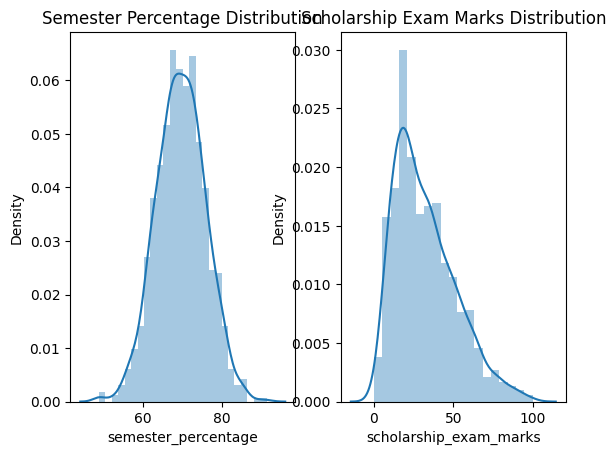

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.subplot(1, 2, 1)
sns.distplot(df['semester_percentage'], kde=True)  # 'kde=True' adds a Kernel Density Estimate
plt.title('Semester Percentage Distribution')

plt.subplot(1, 2, 2)
sns.distplot(df['scholarship_exam_marks'], kde=True)  # Add KDE for smooth curve
plt.title('Scholarship Exam Marks Distribution')

plt.show()


In [8]:
mean= df['semester_percentage'].mean()
std_dev= df['semester_percentage'].std()

In [9]:
print(mean,",",std_dev)

69.6124 , 6.158978751323897


In [10]:
highest_allowed = mean + 3*std_dev

In [11]:
lowest_allowed = mean - 3*std_dev

In [12]:
print(highest_allowed,",",lowest_allowed)

88.08933625397168 , 51.13546374602831


In [13]:
df[(df['semester_percentage']<lowest_allowed) | (df['semester_percentage']>highest_allowed)]

,semester_percentage,scholarship_exam_marks,got_scholarship
485,49.2,44,1
995,88.7,44,1
996,91.2,65,1
997,48.9,34,0
999,49.0,10,1


# Trimming
- # Remove Outlier using Trimming

In [14]:
df[(df['semester_percentage']>lowest_allowed) & (df['semester_percentage']<highest_allowed)]

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0
...,...,...,...
991,70.4,57,0
992,62.6,12,0
993,67.3,21,1
994,64.8,63,0


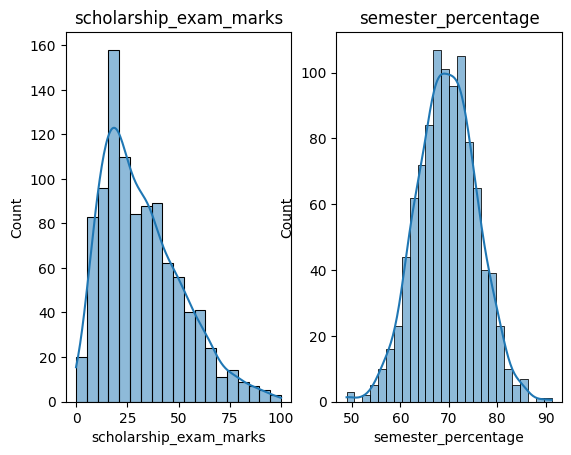

In [15]:
plt.subplot(1,2,1)
sns.histplot(df['scholarship_exam_marks'],kde = True)
plt.title("scholarship_exam_marks")
plt.subplot(1,2,2)
sns.histplot(df['semester_percentage'],kde=True)
plt.title('semester_percentage')
plt.show()

In [16]:
mean = df['scholarship_exam_marks'].mean()
std = df['scholarship_exam_marks'].std()
low= mean - 3*std
high= mean + 3*std
print(low,",",high)

-25.16746701676336 , 89.61746701676336


In [17]:
outlier=df[(df['scholarship_exam_marks']<low) | (df['scholarship_exam_marks']>high)]

In [18]:
outlier

,semester_percentage,scholarship_exam_marks,got_scholarship
9,77.5,94,1
134,63.3,93,0
162,78.0,90,0
324,66.4,90,0
630,65.6,96,1
730,61.4,90,1
846,69.9,97,0
917,59.5,100,0


# Trimming

In [19]:
df[(df['scholarship_exam_marks']>low) & (df['scholarship_exam_marks']<high)]

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0
...,...,...,...
995,88.7,44,1
996,91.2,65,1
997,48.9,34,0
998,86.2,46,1


# Z-Score
- # Remove Outlier using Z-Score

- Z- column is known as standard normal distribution

In [21]:
df['Z_Score'] = (df['semester_percentage'] - df['semester_percentage'].mean())/df['semester_percentage'].std()

In [22]:
df

,semester_percentage,scholarship_exam_marks,got_scholarship,Z_Score
0,71.9,26,1,0.371425
1,74.6,38,1,0.809810
2,75.4,40,1,0.939701
3,64.2,8,1,-0.878782
4,72.3,17,0,0.436371
...,...,...,...,...
995,88.7,44,1,3.099150
996,91.2,65,1,3.505062
997,48.9,34,0,-3.362960
998,86.2,46,1,2.693239


In [25]:
outlier = df[(df['Z_Score']<-3)|(df['Z_Score']>3)]

In [26]:
outlier

,semester_percentage,scholarship_exam_marks,got_scholarship,Z_Score
485,49.2,44,1,-3.314251
995,88.7,44,1,3.099150
996,91.2,65,1,3.505062
997,48.9,34,0,-3.362960
999,49.0,10,1,-3.346724


In [28]:
df[(df['Z_Score']>-3) & (df['Z_Score']<3)]

,semester_percentage,scholarship_exam_marks,got_scholarship,Z_Score
0,71.9,26,1,0.371425
1,74.6,38,1,0.809810
2,75.4,40,1,0.939701
3,64.2,8,1,-0.878782
4,72.3,17,0,0.436371
...,...,...,...,...
991,70.4,57,0,0.127878
992,62.6,12,0,-1.138565
993,67.3,21,1,-0.375452
994,64.8,63,0,-0.781363


# Capping
- # remove outlier using Capping

In [29]:
upper_limit = mean + 3*std
lower_limit = mean - 3*std

In [32]:
df["semester_percentage"] = np.where(df["semester_percentage"]>upper_limit,upper_limit,df['semester_percentage'])

In [33]:
df["semester_percentage"] = np.where(df["semester_percentage"]>lower_limit,lower_limit,df['semester_percentage'])

In [34]:
df

,semester_percentage,scholarship_exam_marks,got_scholarship,Z_Score
0,-25.167467,26,1,0.371425
1,-25.167467,38,1,0.809810
2,-25.167467,40,1,0.939701
3,-25.167467,8,1,-0.878782
4,-25.167467,17,0,0.436371
...,...,...,...,...
995,-25.167467,44,1,3.099150
996,-25.167467,65,1,3.505062
997,-25.167467,34,0,-3.362960
998,-25.167467,46,1,2.693239


# Quartiles
# Remove Outlier using Quartile
- Three point which divide the total data into four equal parts when it has been orderly arranged are known as Quartiles
- Interquartile Range [IQR]
  - The data range that contain the middle 50% of the entries
    - IQR= Q3 - Q1
   
    - The values which are below Q1-1.5IQR or above Q3 + 1.5IQR are outliers.
   
    - This is called the 1.5XIQR rule

In [35]:
data

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0
...,...,...,...
995,88.7,44,1
996,91.2,65,1
997,48.9,34,0
998,86.2,46,1


<Axes: xlabel='scholarship_exam_marks', ylabel='Count'>

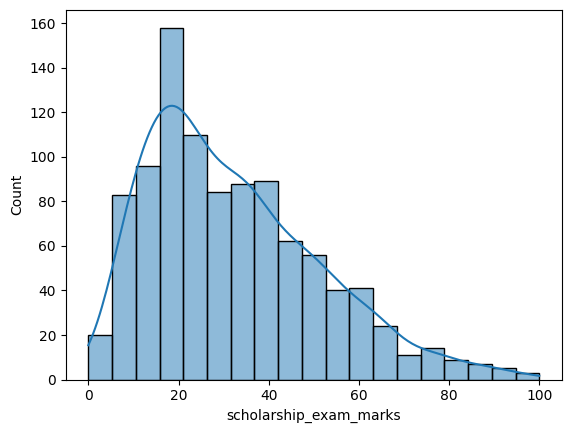

In [41]:
sns.histplot(data['scholarship_exam_marks'],kde=True)

<Axes: ylabel='scholarship_exam_marks'>

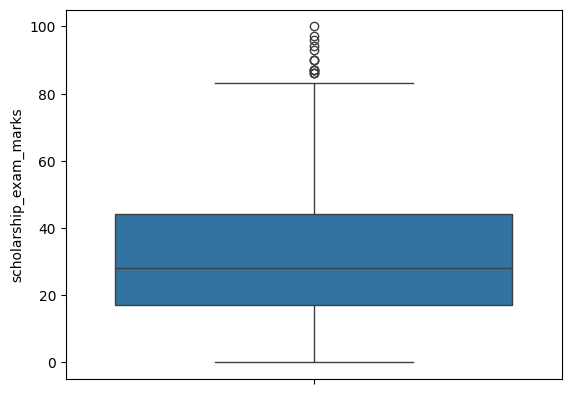

In [42]:
sns.boxplot(data['scholarship_exam_marks'])

In [43]:
Q1= data['scholarship_exam_marks'].quantile(0.25)
Q3 = data["scholarship_exam_marks"].quantile(0.75)

In [44]:
Q1

np.float64(17.0)

In [45]:
Q3

np.float64(44.0)

In [46]:
IQR= Q3-Q1

In [47]:
IQR

np.float64(27.0)

In [58]:
min = Q1 - 1.5*IQR
max = Q3 + 1.5*IQR

In [59]:
min

np.float64(-23.5)

In [60]:
max

np.float64(84.5)

In [64]:
outlier = data[(data['scholarship_exam_marks']<min)|(data['scholarship_exam_marks']>max)]

In [65]:
outlier

,semester_percentage,scholarship_exam_marks,got_scholarship
9,77.5,94,1
40,66.0,86,1
61,75.1,86,0
134,63.3,93,0
162,78.0,90,0
283,70.9,87,0
290,83.8,87,0
311,69.7,87,1
324,66.4,90,0
630,65.6,96,1


# Trimming

In [70]:
data[(data['scholarship_exam_marks']>min)&(data['scholarship_exam_marks']<max)]

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0
...,...,...,...
995,88.7,44,1
996,91.2,65,1
997,48.9,34,0
998,86.2,46,1


In [69]:
new_data = data[(data["scholarship_exam_marks"]>min) & (data["scholarship_exam_marks"]<max)]

{'whiskers': [<matplotlib.lines.Line2D at 0x26342f26ed0>,
 'caps': [<matplotlib.lines.Line2D at 0x26342f25cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x26342dbff50>],
 'medians': [<matplotlib.lines.Line2D at 0x26342f273d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x26342f24350>],
 'means': []}

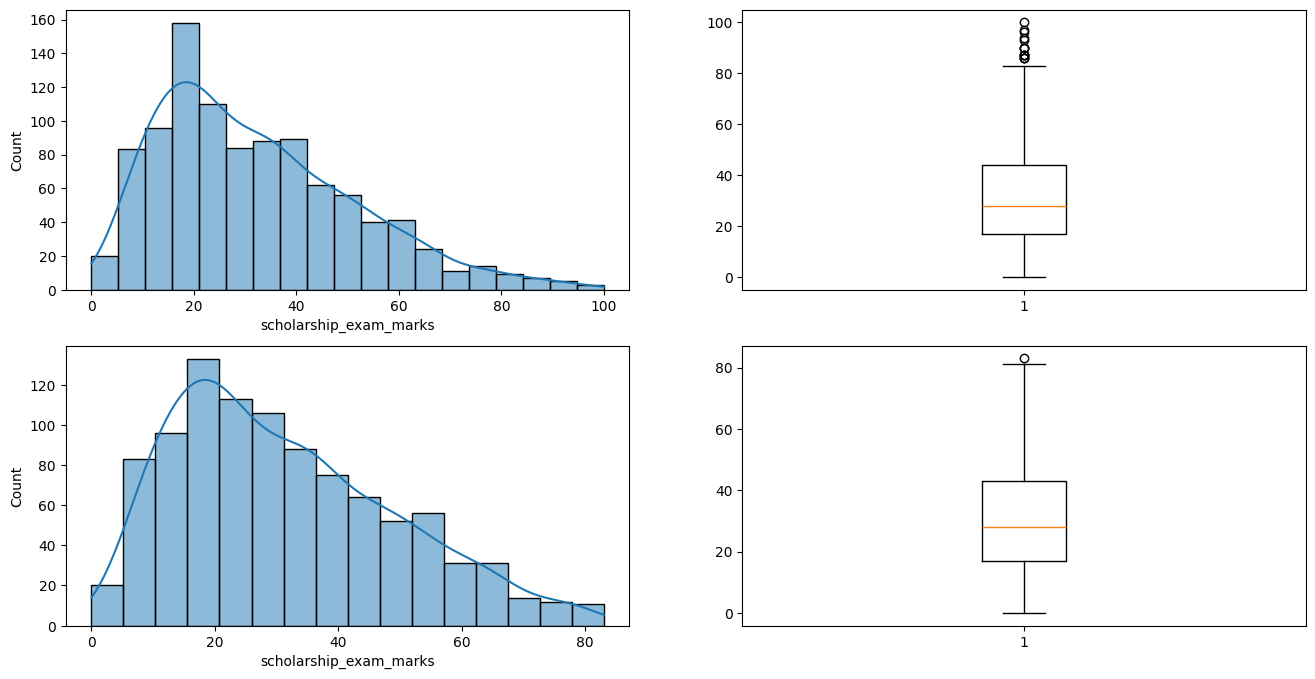

In [72]:
plt.figure(figsize =(16,8))
plt.subplot(2,2,1)
sns.histplot(data['scholarship_exam_marks'],kde=True)

plt.subplot(2,2,2)
plt.boxplot(df["scholarship_exam_marks"])

plt.subplot(2,2,3)
sns.histplot(new_data["scholarship_exam_marks"],kde=True)

plt.subplot(2,2,4)
plt.boxplot(new_data["scholarship_exam_marks"])

# Capping

In [75]:
data['scholarship_exam_marks'] = np.where(data['scholarship_exam_marks']>max,max,data['scholarship_exam_marks'])
data['scholarship_exam_marks'] = np.where(data['scholarship_exam_marks']<min,min,data['scholarship_exam_marks'])

In [76]:
data

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26.0,1
1,74.6,38.0,1
2,75.4,40.0,1
3,64.2,8.0,1
4,72.3,17.0,0
...,...,...,...
995,88.7,44.0,1
996,91.2,65.0,1
997,48.9,34.0,0
998,86.2,46.0,1


<Axes: ylabel='scholarship_exam_marks'>

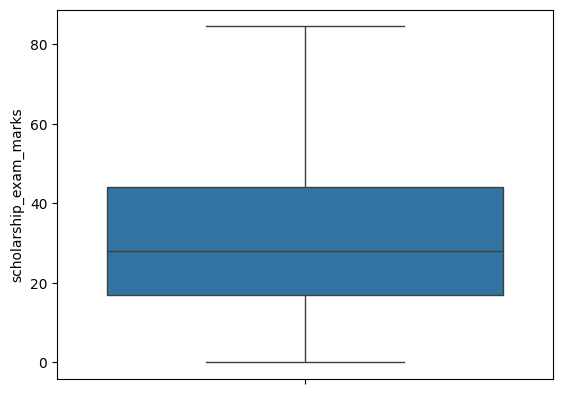

In [77]:
sns.boxplot(data['scholarship_exam_marks'])

# Remove Outlier using Percentile

- Percentile - It is a statiscal measure that gives the percentage of data values that fall below a given data value.

In [96]:
import numpy as np
import pandas as pd
import seaborn as sns

In [97]:
df = pd.read_csv('weight-height.csv')

In [98]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [99]:
df.shape

(10000, 3)

<Axes: xlabel='Height', ylabel='Count'>

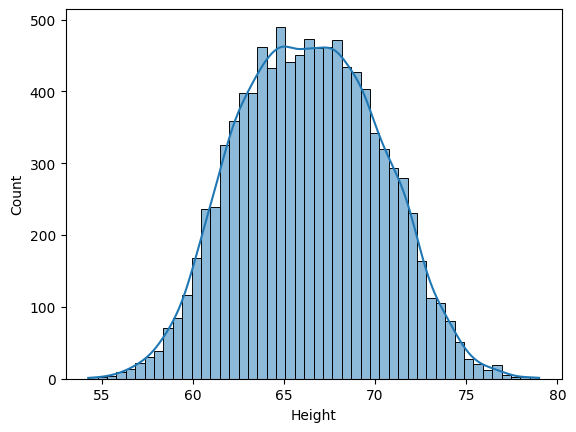

In [100]:
sns.histplot(df['Height'],kde=True)

<Axes: ylabel='Height'>

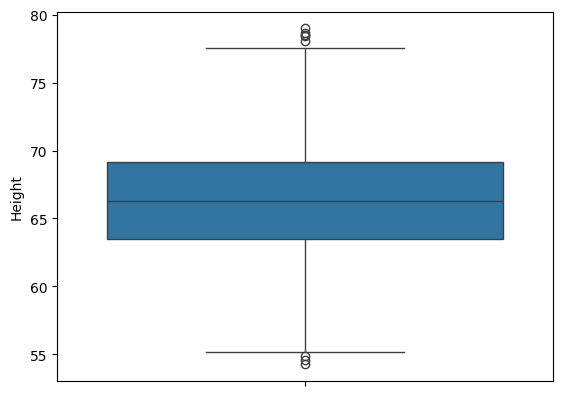

In [101]:
sns.boxplot(df['Height'])

In [102]:
max_limit = df["Height"].quantile(0.99)
min_limit = df["Height"].quantile(0.01)

In [103]:
max_limit

np.float64(74.7857900583366)

In [104]:
min_limit

np.float64(58.13441158671655)

In [105]:
outlier = df[(df['Height']>max_limit) | (df['Height']<min_limit)]

In [106]:
outlier

,Gender,Height,Weight
23,Male,75.205974,228.761781
190,Male,76.709835,235.035419
197,Male,75.944460,231.924749
202,Male,75.140821,224.124271
215,Male,74.795375,232.635403
...,...,...,...
9761,Female,56.975279,90.341784
9825,Female,55.979198,85.417534
9895,Female,57.740192,93.652957
9904,Female,57.028857,101.202551


# Trimming

In [107]:
x=df[(df['Height'] > min_limit) & (df['Height'] < max_limit)]

<Axes: ylabel='Height'>

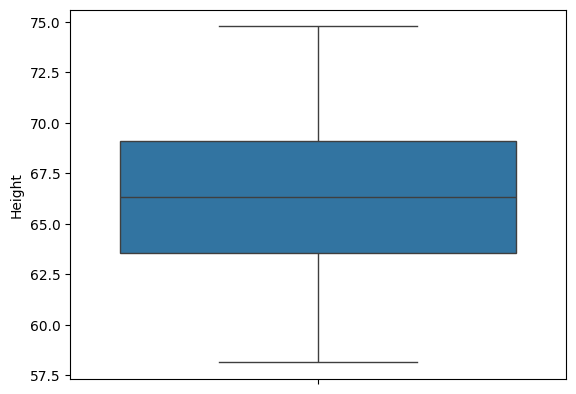

In [109]:
sns.boxplot(x["Height"])

# Capping

In [110]:
df["Height"] = np.where(df['Height'] < min_limit,min_limit,df['Height'])
df["Height"] = np.where(df['Height'] > max_limit,max_limit,df['Height'])

In [111]:
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


<Axes: ylabel='Height'>

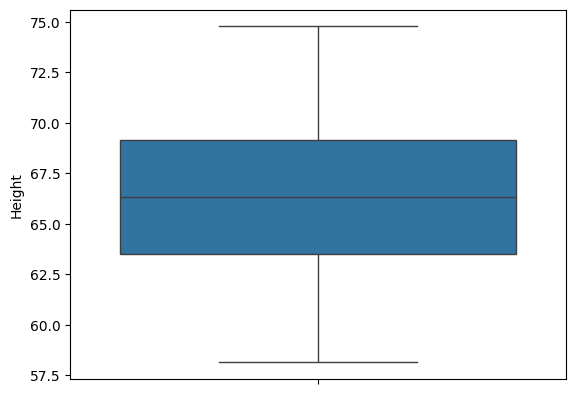

In [112]:
sns.boxplot(df['Height'])

# Correction of datatypes

In [113]:
df = pd.read_csv("ab.csv")

In [115]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48906 entries, 0 to 48905
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48906 non-null  int64  
 1   name                            48890 non-null  object 
 2   host_id                         48906 non-null  int64  
 3   host_name                       48885 non-null  object 
 4   neighbourhood_group             48906 non-null  object 
 5   neighbourhood                   48906 non-null  object 
 6   latitude                        48906 non-null  float64
 7   longitude                       48906 non-null  float64
 8   room_type                       48906 non-null  object 
 9   price                           48906 non-null  int64  
 10  minimum_nights                  48906 non-null  int64  
 11  number_of_reviews               48906 non-null  int64  
 12  last_review                     

In [117]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.890600e+04,4.890600e+04,48906.000000,48906.000000,48906.000000,48906.000000,48906.000000,38854.000000,48906.000000,48906.000000
mean,1.901287e+07,6.760480e+07,40.728952,-73.952175,152.711324,7.031612,23.300454,1.373151,7.142702,112.782031
std,1.098557e+07,7.860866e+07,0.054529,0.046154,240.128713,20.512489,44.607175,1.680270,32.948926,131.620370
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.464662e+06,7.809567e+06,40.690100,-73.983080,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967545e+07,3.078463e+07,40.723080,-73.955685,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915085e+07,1.074344e+08,40.763120,-73.936283,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [119]:
df["id"]=df['id'].astype("str")

In [120]:
df["host_id"]=df['host_id'].astype("str")

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48906 entries, 0 to 48905
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48906 non-null  object 
 1   name                            48890 non-null  object 
 2   host_id                         48906 non-null  object 
 3   host_name                       48885 non-null  object 
 4   neighbourhood_group             48906 non-null  object 
 5   neighbourhood                   48906 non-null  object 
 6   latitude                        48906 non-null  float64
 7   longitude                       48906 non-null  float64
 8   room_type                       48906 non-null  object 
 9   price                           48906 non-null  int64  
 10  minimum_nights                  48906 non-null  int64  
 11  number_of_reviews               48906 non-null  int64  
 12  last_review                     

In [123]:
# Convert host_id to int
df["host_id"]=df['host_id'].astype(int)

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48906 entries, 0 to 48905
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48906 non-null  object 
 1   name                            48890 non-null  object 
 2   host_id                         48906 non-null  int64  
 3   host_name                       48885 non-null  object 
 4   neighbourhood_group             48906 non-null  object 
 5   neighbourhood                   48906 non-null  object 
 6   latitude                        48906 non-null  float64
 7   longitude                       48906 non-null  float64
 8   room_type                       48906 non-null  object 
 9   price                           48906 non-null  int64  
 10  minimum_nights                  48906 non-null  int64  
 11  number_of_reviews               48906 non-null  int64  
 12  last_review                     

In [127]:
df['last_review'] = pd.to_datetime(df["last_review"])

C:\Users\dhana\AppData\Local\Temp\ipykernel_12176\1991195096.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['last_review'] = pd.to_datetime(df["last_review"])


In [128]:
df['last_review'].dtype

dtype('<M8[ns]')

In [130]:
pip install fuzzywuzzy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\dhana\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [133]:
from fuzzywuzzy import fuzz

similarity = fuzz.ratio("dhananjay", "amit")

In [134]:
similarity

15